<font color="#483D8B">
<h1  align="center"> INET4061 Final Project : Creating an FAQ Chatbot from Scratch using NLTK</h1>
<h3 align="center"> Ansh Sikka</h3>
<h3 align="center"> 04/12/2019</h3>






In [1]:
import nltk
import numpy as np
import random
import string
from math import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import pairwise_distances

# Overview

This project aims to explore the abilities of textual models by building a functioning chatbot that answers FAQ answers from the cars.com website. 
We will explore the following concepts in textual data:
* Tokenization
* Linguistic Preprocessing
    * Token Normalization
    * Case-folding
    * Stemming and Normalization
* Models
    * Cosine Similarity-Based Model
    * Euclidean Distance-Based Model
* Running the Chatbot!

The code being used in this notebook is based off the code at the medium article at https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e

The data for this notebook can be found at https://www.cars.com/help/

Additional References
* http://nlp.stanford.edu/IR-book/
* https://www.youtube.com/watch?v=SJDEOWLHYVo
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
* https://machinelearningmastery.com/calculate-bleu-score-for-text-python/

# Business Use Case
* Conversational User Interface
    * Sense of interaction with another person
    * Feels natural to the user - fluidity
* Specific to User's Needs
    * Can answer a specific question, no need to search or browse
    * Can give personalized responses with user's information in context
* Integration with Social Media Apps
    * No need to download seperate apps (e.g. CNN, Weather)
    * All connect to everyone's favorite social media apps
        * Facebook Messenger
        * Kik
        * Slack
* Customer Service
    * Assist (or even replace) customer service agents
    * Instant response times
    * Highly scalable
* Advertising
    * Deliver in-context ads pertaining to current conversation
    * Increase revenue of advertiser and host
* Seamless Customer Experience
    * No waiting for human assistance
    * Available anytime, anywhere
    

# Data

The data being used is a cars.com FAQ for common users. The FAQs can be found at https://www.cars.com/help/.
The data will be raw data taken from the answers section. This will simply be sentences that answer the questions.

In [2]:
f=open('Data/carscom.txt','r',errors = 'ignore')

In [3]:
raw_data = f.read()

# Exploratory Data Analysis

In [4]:
print(raw_data)

Cars.com is a leading digital automotive marketplace that creates meaningful connections between buyers and sellers. Through trusted expert content, on-the-lot mobile features and intelligence, millions of new and used vehicle listings, a comprehensive set of pricing and research tools, and the largest database of consumer reviews in the industry, Cars.com is transforming the car shopping experience.
After entering your initial search criteria from the Cars.com homepage, you can adjust the results by adding filters from the vertical menu that is located on the left side of the page. As you select filters to narrow down your search, the results will adjust to show available vehicle listings within your desired radius/zip code. If using a mobile device, you can filter your results from the ‘Sort Option’ at the top right.
Filter options will only appear if they are available for the vehicle type and radius you are searching. For example, you will not see the year 2011 as a filter option i

## Tokenization
As we can see, this data is plain, raw text copy and pasted from the cars.com FAQ webpage. We should tokenize the text to analyze the data in bits rather than entire chunks. To do this, we will use NLTK's 'punkt' model: this model tokenizes the words into single words in a list. 

In definition, a token is an instance of a sequence of characters in a document that are grouped together as a useful semantic unit for processing.

In [5]:
nltk.download('punkt')
word_tokens = nltk.word_tokenize(raw_data) # converts to list of words
sent_tokens = nltk.sent_tokenize(raw_data) # converts to a list of sentences

[nltk_data] Downloading package punkt to /Users/anshikka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Frequency of Tokens
Let's visualize frequency of different words in this dataset. This way, we can figure out keywords that would get the chatbot to respond in correctly and accurately. The function to get the graph for this was referenced from https://stackoverflow.com/questions/29755861/plotting-words-frequency-and-nltk. We will be using the individual tokens to assess their frequency.

In [6]:
def graph(word_tokens):
  tokens = word_tokens
  fd = nltk.FreqDist(tokens)
  fd.plot(30,cumulative=False, title="Frequency of Tokens from Cars.com FAQ Dataset")

In [7]:
graph(word_tokens)

<Figure size 640x480 with 1 Axes>

### Stop Words
As we can see, the words with the most frequency include 'the', 'your', 'to', 'a,' etc. Judging by the commonality of these words, we can assume that they won't be as important to training to model based on our specific goal: to answer qeustions about Cars.com. These are called stop words. Stop words are extremely common words with little value. Usually these words have to be excluded from the vocabulary for meaningful training.

### Normalization
Normalization is getting the data into a form that will be useful for the training model. We want to clean this data as much as possible, removing unncessesary suffixes, prefixes, and punction. We also want to make all words lowercase.


#### Stemming and Lemmatization
Stemming/Lemmatization help extract the base form of words. For example, let's say we have the word "driving." The stemmer would extract the "-ing" ending to get the base word. However, a problem with a stemmer is that it can often create words that don't exist. In this case, it would create a word called "driv". A lemmer would avoid this by actually returning an actual word. Lemmers are more generalized since they can handle similar words such as "good" and "better" in the same lemma.
A module from NLTK's API called WordNet helps with lemmatization as it's a semantically-oriented dictionary of English.

In [8]:
nltk.download('wordnet')

lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return[lemmer.lemmatize(token) for token in tokens]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anshikka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Punctuation
When training the model, we base our training off of words given by context, not by punctuation. This is why it is best to reduce noise by removing all punctuation in the text data.

In [9]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

#### Case-Folding
Since we want the training model to treat all data equally, we want it to treat uppercase and lowercase words the same. This is why it is best to convert all training data for text to a lowercase form. This is called case-folding.

In [10]:
def normalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

Now that everything is normalized, let's print out the frequency of tokens again.

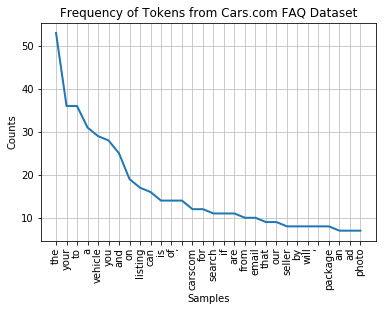

In [11]:
graph(normalize(raw_data))

Looking at this graph, we can see that all of the words are in lowercase and punctuation is gone. These are all stem words that were lemmatized (in their base form). There are no alternate forms of words including words ending with "-ing", "-ed", etc. Stop words will be removed with TF-IDF (Term Frequency-Inverse Document Frequency)

# Models
We will run 2 models on the text data to see which one yields better results.

## TF-IDF (Term Frequency-Inverse Document Frequency)
TF-IDF is a text-learning model that is based on:
* Measuring how important a word is in the context
    * The tf-idf value increases proportionally to the number of times a word appears in the doccument, offset by the frequency of the word in the corpus
    * It is used for stop-word filtering

In [12]:
def tfidf(sentence_tokens):
    TfidfVec = TfidfVectorizer(tokenizer=normalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sentence_tokens)
    return tfidf


## Cosine Similarity
Now that we have numerical vectors in a vector space, we can now apply them to computational algorithms. In this simple case, one can use cosine similarity. This method simply returns the cosine of the angle between the vectors. In terms of trignometry, more similar words will have a smaller angle between them, considering them as "similar". This will help the bot pick out the response sentences from the data that best matches the user's response.

In [13]:
stored_responses = []
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    importances = tfidf(sent_tokens)
    vals = cosine_similarity(importances[-1], importances)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response, req_tfidf
    else:
        robo_response = robo_response+sent_tokens[idx]
        stored_responses.append(robo_response.split())
        return robo_response, req_tfidf

In [14]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [15]:
flag = True
total_similarity = 0
print("Cars.com: This is the Cars.com FAQ chatbot. If you want to exit, type 'Bye'!")
responses = 0
while(flag == True):
  user_response = input()
  user_response = user_response.lower()
  if(user_response != 'bye'):
    if(user_response=='thanks' or user_response == 'thank you'):
      flag = False
      print("Cars.com Bot: You are welcome..")
    else:
      if(greeting(user_response) != None):
        print("Cars.com Bot: "+greeting(user_response))
      else:
        responses += 1
        print("Cars.com Bot: ", end = "")
        result = response(user_response)
        print(result[0])
        total_similarity+=result[1]
        sent_tokens.remove(user_response)
  else:
    flag = False
    print("Cars.com Bot: Bye!")

if responses == 0:
    responses = 1
print("Average Cosine Similarity: ", total_similarity/responses)
bleu_score = sent_tokens

Cars.com: This is the Cars.com FAQ chatbot. If you want to exit, type 'Bye'!
hi
Cars.com Bot: hello
what's the weathert


/miniconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Cars.com Bot: I am sorry! I don't understand you
how can prospective buyers contact me?
Cars.com Bot: Prospective buyers can contact you via phone by clicking “Call This Seller” to expose your phone number.
how do i delete an ad?
Cars.com Bot: You can delete, renew, edit or place a listing on hold all from your seller dashboard.
bye
Cars.com Bot: Bye!
Average Cosine Similarity:  0.2556791153314


### Evaluation of Cosine Similarity-Based Model
Sadly, we cannot assess performance as well for a chatbot using cosine similarity. However, we can compute the average cosine similarity (how close a response was to the question being asked) over the execution of the chatbot. Overall, we want to aim for a higher cosine simiarity. It ranges from 0 to 1, with 1 being an exact match to the text inputted by the user. If we have 1, it means that the data we entered exactly matches one of our responses. This isn't necessairly good as it is just returning a repeat of what we asked. This is why we need a variety of data. Being 0 or close to 0 means that it could not return a close enough response to the input that was given. We should aim for an average of 0.7 to 0.8 for the best responses. 

### Interpretation of Cosine Similarity-Based Model
As we can see from the chatbot results, the responses are pretty accurate to what the user enters, but doesn't completely give the correct answer. For example, let's say one of the key words is "buy cars". It can have a variety of responses and might chose the closest one, but it may not be the best one. This is all determined by context. Context is a major impediment to building chatbots since a model has to take in the correct decision based on previous responses building the current situation that arises. Cosine similarity-based chatbots are very simple and can be used for as simple information dissemination bots. This can be used in a variety of mediums such as FAQs, simple interactive learning, questions, etc. However, they aren't conversational.

##  Euclidean Distance Similarity
Euclidean Distance is simply the straight line distance from one vector to the other. We want to minimize this by getting the responses with the lowest euclidean distance.

In [16]:
def response_euclidean(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    importances = tfidf(sent_tokens)
    vals = pairwise_distances(importances[-1], importances, metric='euclidean')
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response, req_tfidf
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response, req_tfidf

In [17]:
flag = True
total_distance = 0
print("Cars.com: This is the Cars.com FAQ chatbot. If you want to exit, type 'Bye'!")
responses = 0
while(flag == True):
  user_response = input()
  user_response = user_response.lower()
  if(user_response != 'bye'):
    if(user_response=='thanks' or user_response == 'thank you'):
      flag = False
      print("Cars.com Bot: You are welcome..")
    else:
      if(greeting(user_response) != None):
        print("Cars.com Bot: "+greeting(user_response))
      else:
        responses += 1
        print("Cars.com Bot: ", end = "")
        result = response_euclidean(user_response)
        print(result[0])
        total_distance+=result[1]
        sent_tokens.remove(user_response)
  else:
    flag = False
    print("Cars.com Bot: Bye!")

print("Average Distance: ", total_distance/responses)

Cars.com: This is the Cars.com FAQ chatbot. If you want to exit, type 'Bye'!
hi
Cars.com Bot: *nods*
how can prospective buyers contact me?
Cars.com Bot: HISTORY REPORTS - Upgrade your ad package to include a Carfax report.
bye
Cars.com Bot: Bye!
Average Distance:  1.187130483152017


### Evaluation of Euclidean Distance Similarity-Based Model
Being based on a metric itself, it is kind of hard to evaluate this model mathematically. We can always compute the average distance of the vectors over the execution of the chatbot. However euclidean distances can be infinte. They can range from negative infinity to infinity, so finding a correct measure is hard. We can see that from chatting with bot, the results aren't very accurate. A lot of them don't even make sense. 

### Interpretation of Euclidean Distance Similarity-Based Model
Euclidean distance isn't the best way for chatbots to operate with because euclidean distance does NOT take into account the direction of a vector. When classifying text, one needs to use angular distance. This would cause vectors with completely different angles to become clustered in the space, considering everything as "similar" and wouldn't show any meaningful responses.

# Conclusion

| Model              	| Accept or No? 	| Reason                                                                                                                                                                                                                                        	|
|--------------------	|---------------	|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| Cosine Similarity  	| Yes           	| Cosine similarity uses the individual token vectors to compare different angles between them. Since vectors are angularly measured, this would be great for chatbots searching for context of what the user has input.                        	|
| Euclidean Distance 	| No            	| Euclidean distance uses distance rather than angle. Since vectors are angularly measured, they will cluster in one area. This approach will be extremely inaccurate since it is not properly choosing the  direction of where the token goes. 	|

Overall, building a chatbot requires a plethora of data and structural complexity. If this chat bot were to be improved, I would have employed deep learning. Deep learning would help keep track of context while maintaining a very human-like conversational tone. Chatbots like Siri and Google Assistant use deep learning to accomplish tasks with just a command.

## Business Use Case for a Cars.com FAQ Bot
Being a huge platform to sell used cars, people are bound to have common questions. It would be a waste of resources for the company to employ many on-call employees to answer these simple questions. With a chatbot, people who like more personalized interactions will tend to use that and let the customer service agents handle more complex issues. This will scale up productivity and drive up revenue.